### Практическое задание к уроку 2

1. У вас, с прошлого урока, имеются реализации расчёта среднеквадратичной ошибки и её градиента для линейнй регрессии с коэффициентами при факторах(w) и свободным коэффициентам.  
В этом задании вы должны модифицировать реализацию рассчёта среднеквадратичной ошибки и рассчёта её производной, так, чтобы с к среднеквадратичной ошибке добавлялась l2 регулярязационная поправка: $ +c*\sum \limits _{j}  w_{j}^2 $ а к градиенту- ссответствующее выражение для градиента регулярязационной поправки.  

2. На основе этих функций создайте свою регуляризированную полиномиальную регрессию и опробуйте на одном из примеров построения полиномиальной модели из этого урока. <br>
<i><b>Пояснение:</b> Для этого Вам достаточно создать класс, который наследуется от класса polynomial_regression из данного урока, и переопределить в нём методы mserror, mserror_grad(под переопределением подразумевается создание на новом классе методов с таким же названием). </i>

3. \* (по желанию). Оцените предсказательную способность реализованного метода с использование 5-ти ступенчатой кросс-валидации, показанной в примере выше. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from linear_regression import polynomial_regression

%matplotlib inline
np.set_printoptions(suppress=True)

In [2]:
# Полиноминальная регнессия с L2 регуляризацией

class polynomial_regression_with_l2(polynomial_regression):
    
    def __init__(self, alpha=1.0, *args, **kwargs):
        # Сила (коэффициент) регуляризации
        self.alpha = alpha
        super().__init__(*args, **kwargs)
    
    def _mserror(self, X, y_real):
        # рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T) + self.w0
        return (np.sum((y - y_real)**2) / y_real.shape[0]) + self.alpha * np.sum(np.append(self.w, self.w0) ** 2)
    
    def _mserror_grad(self, X, y_real):
        # рассчёт градиента ошибки.
        # 2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        # np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta = (X.dot(self.w.T) + self.w0 - y_real)
        return 2 * delta.T.dot(X) / y_real.shape[0] + 2 * self.alpha * np.sum(np.append(self.w, self.w0)), np.sum(2 * delta) / y_real.shape[0] + 2 * self.alpha * np.sum(np.append(self.w, self.w0))

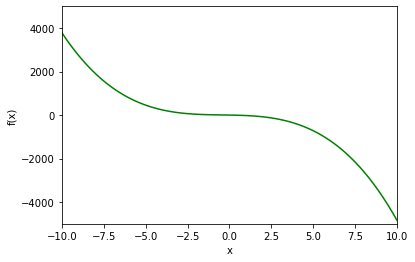

In [3]:
# Строю график функции
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
dots = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')

In [4]:
# Генерирую 10 случайных точек с шумом
np.random.seed(0)
x_data = np.random.uniform(-10, 10, 10)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

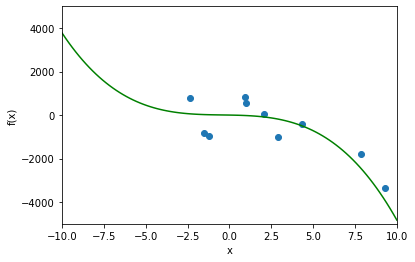

In [5]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

In [6]:
x_data

array([ 0.97627008,  4.30378733,  2.05526752,  0.89766366, -1.52690401,
        2.91788226, -1.24825577,  7.83546002,  9.27325521, -2.33116962])

In [7]:
f_data

array([  562.23173636,  -429.01086378,    50.96901631,   832.65705899,
        -834.68466621, -1012.37697356,  -942.63389938, -1768.97251701,
       -3346.57199233,   795.42088169])

In [8]:
# Построение полиномиальной регрессии с L2 регуляризацией
poly_mod_f2=polynomial_regression_with_l2(max_power=3, alpha=100)
poly_mod_f2.fit(x_data, f_data)
print(f'Коэффициенты при факторах: {poly_mod_f2.w}, нулевой коэффициент (интерcепт): {poly_mod_f2.w0}')

Коэффициенты при факторах: [[ 3.10500874 -2.14610118 -3.89594383]], нулевой коэффициент (интерcепт): 2.2133766910605672


In [9]:
# Построение полиномиальной регрессии без регуляризацией
poly_mod = polynomial_regression(3)
poly_mod.fit(x_data, f_data)
print(f'Коэффициенты при факторах: {poly_mod.w}, нулевой коэффициент (интерcепт): {poly_mod.w0}')

Коэффициенты при факторах: [[ 0.16607311 -3.79621822 -3.66447349]], нулевой коэффициент (интерcепт): -0.9528367163131777


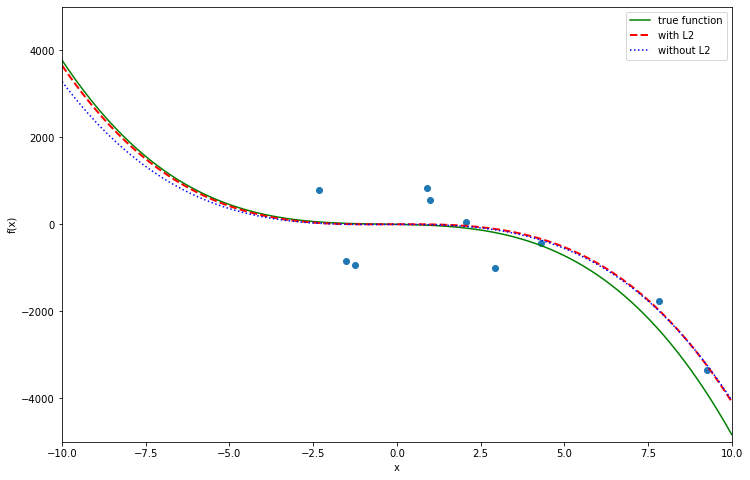

In [10]:
# Графики функций с получившимися коэффициентами
plt.figure(figsize=(12, 8))

plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g', label='true function')
plt.scatter(x_data, f_data)

# Полиномиальная регрессия с регуляризатором f2
plt.plot(dots, poly_mod_f2.predict(dots), 'r--', linewidth=2, label='with L2')

# Полиномиальная регрессия
plt.plot(dots, poly_mod.predict(dots), 'b:', label='without L2')

plt.legend()
plt.show()

Как видно из графиков, полиномиальная модель с регуляризацией немного точнее по сравнению с моделью беp регуляризации. Особенно хорошо это видно в левой верхней части графика.  
Расчитаю коэффициент $R^2$ и проведу 5-ступенчатую кросс-валидацию для оценки получившейся модели.

In [11]:
# Расчет коэффициента R^2
def r_square(y, y_real):
    ss_total=np.sum((y_real-np.mean(y_real))**2)
    ss_res=np.sum((y_real-y)**2)
    return 1-ss_res/ss_total

print(r_square(poly_mod_f2.predict(x_data), f_data))

0.7286622054159442


In [12]:
# Кросс-валидация модели с регуляризацией
indexes = np.arange(len(f_data)) % 5
y_actual = []
y_predicted = []

for i in range(5):
    y_actual.append(f_data[indexes == i])
    model = polynomial_regression_with_l2(max_power=3, alpha=100)
    model.fit(x_data[indexes != i], f_data[indexes != i])
    y_predicted.append(model.predict(x_data[indexes == i]))
    
y_actual = np.concatenate(y_actual)
y_predicted = np.concatenate(y_predicted)
print(r_square(y_predicted, y_actual))

0.700723746434218


In [13]:
# Кросс-валидация модели без регуляризации
indexes = np.arange(len(f_data)) % 5
y_actual = []
y_predicted = []

for i in range(5):
    y_actual.append(f_data[indexes == i])
    model1 = polynomial_regression(3)
    model1.fit(x_data[indexes != i], f_data[indexes != i])
    y_predicted.append(model1.predict(x_data[indexes == i]))
    
y_actual = np.concatenate(y_actual)
y_predicted = np.concatenate(y_predicted)
print(r_square(y_predicted, y_actual))

0.6808290363871259


Результаты кросс-валидации моделей потвердили вывод о более лучшем результате, показываемом полиномиальной функцией с L2 регуляризацией.